# Bagging for Competição ML @SBS/DAA - Edição 2023/2024

Goal: predict Injeção na rede (kWh)

In [11]:
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

In [12]:
%store -r model_dt
%store -r data
%store -r data_test

In [13]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(11016, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  int64         
 5   dt                       11016 non-null  int64         
 6   city_name                11016 non-null  object        
 7   

In [14]:
print(data_test.columns)
print(data_test.shape)
print(data_test.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(2256, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injeção na rede (kWh)    0 non-null      float64       
 5   dt                       2256 non-null   int64         
 6   city_name                2256 non-null   object        
 7   tem

In [15]:
data_bg   = data.copy()
data_bg_test = data_test.copy()
rem = ['dt','pressure','wind_speed','Mes','Hora','city_name','Data','rain_1h','clouds_all'] 
data_bg.drop(rem,axis=1,inplace=True)
data_bg_test.drop(rem ,axis=1,inplace=True)
nulls = False
def interpolate_linear(data_bg_test):
    data_bg_test['temp']                = data_bg_test['temp'].interpolate(method='linear')
    data_bg_test['feels_like']          = data_bg_test['feels_like'].interpolate(method='linear')
    data_bg_test['temp_min']            = data_bg_test['temp_min'].interpolate(method='linear')
    data_bg_test['temp_max']            = data_bg_test['temp_max'].interpolate(method='linear')
    data_bg_test['humidity']            = data_bg_test['humidity'].interpolate(method='linear')
    # data_bg_test['clouds_all']          = data_bg_test['clouds_all'].fillna(0)
    data_bg_test['weather_description'] = data_bg_test['weather_description'].interpolate(method='linear')

if nulls:
    interpolate_linear(data_bg_test)
data_bg.info()
data_bg_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   humidity                 11016 non-null  int64  
 9   weather_description      11016 non-null  int64  
 10  Estacao                  11016 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 946.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 11 columns):
 #   Column                   

In [16]:
from sklearn.model_selection import train_test_split

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_bg.drop(['Injeção na rede (kWh)'],axis=1)
y = data_bg['Injeção na rede (kWh)'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=random)

In [17]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (11016, 10). X_train has shape (8262, 10) while X_test has shape (2754, 10)
The shape of y (11016, 1). y_train has shape (8262, 1) while y_test has shape (2754, 1)


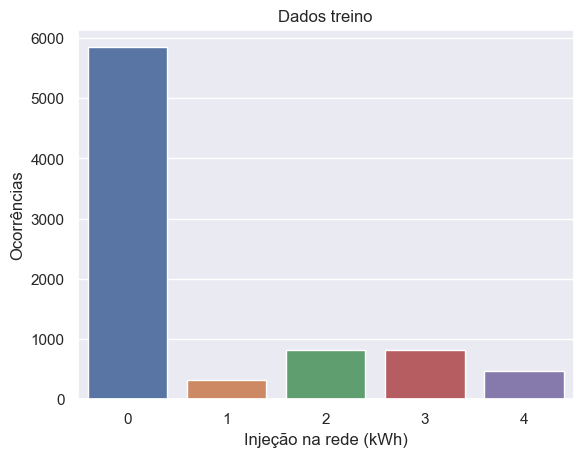

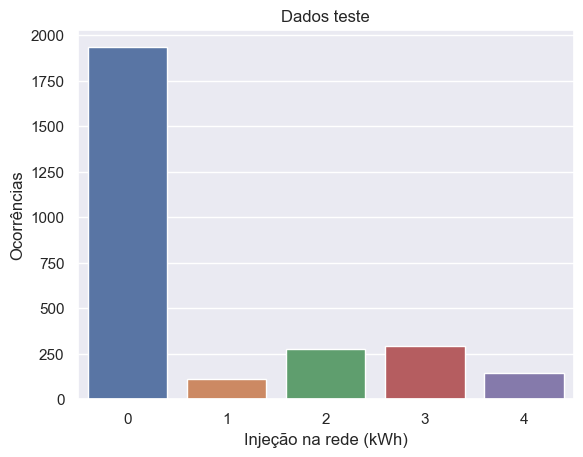

In [18]:
grafico_barras(y_train,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')
grafico_barras(y_test,'Injeção na rede (kWh)','Dados teste','Injeção na rede (kWh)','Ocorrências')

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [32]:

sss = StratifiedShuffleSplit(n_splits=10, test_size=20, random_state=2022)

In [33]:
bg_model = BaggingClassifier(estimator=dt_model, bootstrap=True, random_state=2022)

In [34]:
n_estimators = [10, 40, 60, 80, 100, 160]

In [35]:
parameters = {'n_estimators': n_estimators}

In [36]:
grid_bg = GridSearchCV(estimator = bg_model, param_grid = parameters, cv = sss)

In [37]:
grid_bg.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=2022, test_size=20,
            train_size=None),
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=0),
                                         random_state=2022),
             param_grid={'n_estimators': [10, 40, 60, 80, 100, 160]})

In [38]:
bst_bg_model = grid_bg.best_estimator_

In [39]:
print(bst_bg_model)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=0),
                  n_estimators=80, random_state=2022)


In [40]:
bst_bg_model.fit(X_train, y_train.values.ravel())

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=0),
                  n_estimators=80, random_state=2022)

In [41]:
bst_bg_score = bst_bg_model.score(X_test, y_test)

In [42]:
print("Accuracy: %.2f%%" % (bst_bg_score *100))

Accuracy: 84.13%


In [43]:
bg_predictions = bst_bg_model.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, accuracy_score
def stats_confusion_matrix(model,x_test,y_test):
    predictions = model.predict(x_test)
    print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))
    print(classification_report(y_test,predictions))
    ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    plt.show()

0.84 accuracy
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1933
           1       0.39      0.22      0.28       110
           2       0.54      0.58      0.56       276
           3       0.56      0.63      0.59       292
           4       0.53      0.49      0.51       143

    accuracy                           0.84      2754
   macro avg       0.60      0.58      0.58      2754
weighted avg       0.84      0.84      0.84      2754



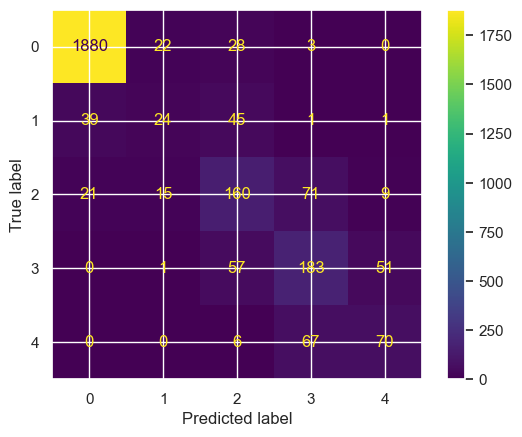

In [49]:
stats_confusion_matrix(bst_bg_model,X_test,y_test)

In [50]:
def gera_csv(predictions,name):
    row_ids = range(1, len(predictions) + 1)
    submission_df = pd.DataFrame({'RowId': row_ids, 'Result': predictions})
    replace_map = {'Result': {0:'None',1: 'Low', 2: 'Medium' ,3: 'High',4 : 'Very High' }}
    submission_df.replace(replace_map,inplace=True)
    submission_df.to_csv(name, index=False)

In [54]:
X_test_submission = data_bg_test.drop(['Injeção na rede (kWh)'],axis=1)
predictions_bg = bst_bg_model.predict(X_test_submission)
gera_csv(predictions_bg,'grupo20_bg_1.csv')

In [55]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are your original data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Creating DataFrames from the resampled data
X_resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=y_train.columns)

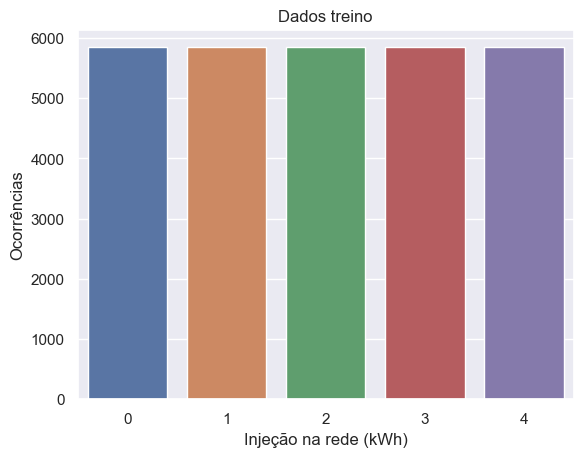

In [56]:
balanced_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)
grafico_barras(y_resampled_df,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')

/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.83 accuracy
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1933
           1       0.36      0.58      0.44       110
           2       0.55      0.53      0.54       276
           3       0.54      0.59      0.56       292
           4       0.51      0.55      0.53       143

    accuracy                           0.83      2754
   macro avg       0.59      0.64      0.61      2754
weighted avg       0.85      0.83      0.84      2754



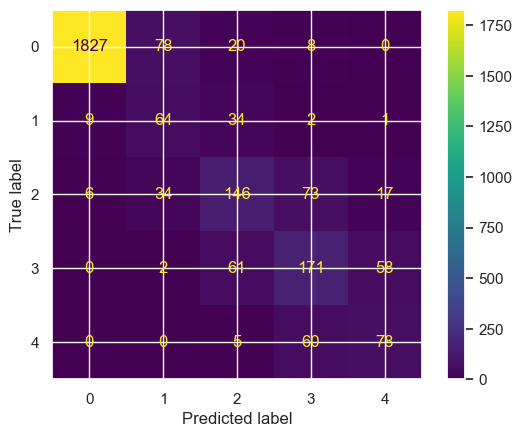

In [59]:
bst_bg_model2 = grid_bg.best_estimator_
bst_bg_model2.fit(X_resampled_df,y_resampled_df)
stats_confusion_matrix(bst_bg_model2,X_test,y_test)
predictions_bg = bst_bg_model.predict(X_test_submission)
gera_csv(predictions_bg,'grupo20_bg_2.csv')